# Tugas Kelompok 2 Analisis Big Data

- Ronggo Tsani Musyafa (21/473988/PA/20449)
- Muhammad Irfan (21/474436/PA/20484)
- Faiz Unisa Jazadi (21/475928/PA/20563)

## Jawaban

In [119]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col, translate
from pyspark.sql.types import IntegerType, FloatType

spark = SparkSession.builder.getOrCreate()

df = spark.read.csv('googleplaystore.csv', header=True, inferSchema=True)

df.show(5)

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+----------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|    Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+----------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design| January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|  August 1, 2018|             1.2.4|4.0.3 and up|
|Ske

In [102]:
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



### Data Wrangling
Lakukan data wrangling menggunakan PySpark dataframe seperti pada Part 4: Data Wrangling pada notebook. Beberapa perintah di bagian ini tidak jalan (error). Betulkan agar dapat dijalankan.

#### Remove null values

In [120]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|     0|      0|   0|       0|   0|    0|             1|     0|           0|          1|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



In [121]:
df = df.dropna(how='any')

#### Remove unwanted characters

In [122]:
df = df.withColumn('Size', translate('Size', 'Mk', ''))
df = df.withColumn('Installs', translate('Installs', '+,', ''))
df = df.withColumn('Price', translate('Price', '$', ''))

df.show(5)

+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|              Genres|    Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|  19|   10000|Free|    0|      Everyone|        Art & Design| January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|  14|  500000|Free|    0|      Everyone|Art & Design;Pret...|January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510| 8.7| 5000000|Free|    0|      Everyone|        Art & Design|  August 1, 2018|             1.2.4|4.0.3 and up|
|Sketch - Draw & P...|

#### Filter Unwanted Value

In [106]:
df = df.where((col("Size") != "Varies with device" ))

#### Change data types of columns

In [124]:
df = df.withColumn("Installs", df["Installs"].cast(IntegerType()))
df = df.withColumn("Rating", df["Rating"].cast(FloatType()))
df = df.withColumn("Size", df["Size"].cast(FloatType()))
df = df.withColumn("Price", df["Price"].cast(FloatType()))

df.show(5)

+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|              Genres|    Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+--------+----+-----+--------------+--------------------+----------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|19.0|   10000|Free|  0.0|      Everyone|        Art & Design| January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|14.0|  500000|Free|  0.0|      Everyone|Art & Design;Pret...|January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510| 8.7| 5000000|Free|  0.0|      Everyone|        Art & Design|  August 1, 2018|             1.2.4|4.0.3 and up|
|Sketch - Draw & P...|

#### Rename columns

In [108]:
df = df.withColumnRenamed('Size', 'Size(M)')
df = df.withColumnRenamed('Installs', 'Installs(+)')
df = df.withColumnRenamed('Price', 'Price($)')
df.show(5)

+--------------------+--------------+------+-------+-------+-----------+----+--------+--------------+--------------------+----------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size(M)|Installs(+)|Type|Price($)|Content Rating|              Genres|    Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+-------+-----------+----+--------+--------------+--------------------+----------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|   19.0|      10000|Free|     0.0|      Everyone|        Art & Design| January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|   14.0|     500000|Free|     0.0|      Everyone|Art & Design;Pret...|January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|    8.7|    5000000|Free|     0.0|      Everyone|        Art & Design|  August 1, 2018| 

#### Drop Unwanted Columns

In [125]:
df = df.drop("Reviews", "Genres", "Current Ver")
df.show(5)

+--------------------+--------------+------+----+--------+----+-----+--------------+----------------+------------+
|                 App|      Category|Rating|Size|Installs|Type|Price|Content Rating|    Last Updated| Android Ver|
+--------------------+--------------+------+----+--------+----+-----+--------------+----------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|19.0|   10000|Free|  0.0|      Everyone| January 7, 2018|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|14.0|  500000|Free|  0.0|      Everyone|January 15, 2018|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7| 8.7| 5000000|Free|  0.0|      Everyone|  August 1, 2018|4.0.3 and up|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5|25.0|50000000|Free|  0.0|          Teen|    June 8, 2018|  4.2 and up|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3| 2.8|  100000|Free|  0.0|      Everyone|   June 20, 2018|  4.4 and up|
+--------------------+--------------+------+----+--------+----+-----+-----------

### Query Data

Lakukan query data seperti pada Part 5: Query Data pada notebook menggunakan SQL
(bukan dataframe). Note: sebelum melakukan query dengan SQL, edit nama-nama
kolom yang memuat spasi dengan menghilangkan spasinya, misal: ‘Android Ver’
menjadi AndroidVer.


In [149]:
df.createOrReplaceTempView("df")

#### Renamed Column

In [150]:
df = df.withColumnRenamed("Content Rating", "ContentRating")
df = df.withColumnRenamed("Last Updated", "LastUpdated")
df = df.withColumnRenamed("Current Ver", "CurrentVer")
df = df.withColumnRenamed("Android Ver", "AndroidVer")
df = df.withColumnRenamed("Price($)", "Price")
df = df.withColumnRenamed("Size(M)", "Size")
df = df.withColumnRenamed("Installs(+)", "Installs")
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Size: float (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- ContentRating: string (nullable = true)
 |-- LastUpdated: string (nullable = true)
 |-- AndroidVer: string (nullable = true)



#### Query by Single Condition

In [151]:
spark.sql("SELECT * FROM df WHERE ContentRating = 'Teen'").show(5)

+--------------------+-----------------+------+----+--------+----+-----+-------------+--------------+------------+
|                 App|         Category|Rating|Size|Installs|Type|Price|ContentRating|   LastUpdated|  AndroidVer|
+--------------------+-----------------+------+----+--------+----+-----+-------------+--------------+------------+
|Sketch - Draw & P...|   ART_AND_DESIGN|   4.5|25.0|50000000|Free|  0.0|         Teen|  June 8, 2018|  4.2 and up|
|Tattoo Name On My...|   ART_AND_DESIGN|   4.2|20.0|10000000|Free|  0.0|         Teen| April 2, 2018|  4.1 and up|
|     I Creative Idea|   ART_AND_DESIGN|   4.7| 4.2|   10000|Free|  0.0|         Teen|April 27, 2018|  4.1 and up|
|Android Auto - Ma...|AUTO_AND_VEHICLES|   4.2|16.0|10000000|Free|  0.0|         Teen| July 11, 2018|  5.0 and up|
|Selfie Camera Pho...|           BEAUTY|   4.1|30.0|   50000|Free|  0.0|         Teen| July 24, 2018|4.0.3 and up|
+--------------------+-----------------+------+----+--------+----+-----+--------

In [152]:
spark.sql("SELECT * FROM df WHERE Rating > 4.7").show(5)

+--------------------+-----------------+------+----+--------+----+-----+-------------+--------------+----------+
|                 App|         Category|Rating|Size|Installs|Type|Price|ContentRating|   LastUpdated|AndroidVer|
+--------------------+-----------------+------+----+--------+----+-----+-------------+--------------+----------+
|Mcqueen Coloring ...|   ART_AND_DESIGN|   NaN| 7.0|  100000|Free|  0.0|     Everyone| March 7, 2018|4.1 and up|
|Harley Quinn wall...|   ART_AND_DESIGN|   4.8| 6.0|   10000|Free|  0.0|     Everyone|April 25, 2018|3.0 and up|
|Tickets SDA 2018 ...|AUTO_AND_VEHICLES|   4.9|33.0|  100000|Free|  0.0|     Everyone| July 18, 2018|4.0 and up|
|CDL Practice Test...|AUTO_AND_VEHICLES|   4.9|17.0|  100000|Free|  0.0|     Everyone|  July 3, 2018|4.2 and up|
|DMV Permit Practi...|AUTO_AND_VEHICLES|   4.9|27.0|  100000|Free|  0.0|     Everyone|  July 3, 2018|4.2 and up|
+--------------------+-----------------+------+----+--------+----+-----+-------------+----------

#### Query by Value Range

In [153]:
spark.sql("SELECT * FROM df WHERE `Price` between 1 and 2").show(5)

+--------------------+--------+------+-----+--------+----+-----+-------------+-----------------+------------+
|                 App|Category|Rating| Size|Installs|Type|Price|ContentRating|      LastUpdated|  AndroidVer|
+--------------------+--------+------+-----+--------+----+-----+-------------+-----------------+------------+
|   Truth or Dare Pro|  DATING|   NaN| 20.0|      50|Paid| 1.49|         Teen|September 1, 2017|  4.0 and up|
|                Clue|    GAME|   4.6| 35.0|  100000|Paid| 1.99| Everyone 10+|    July 30, 2018|  5.0 and up|
|Arrhythmias and D...| MEDICAL|   NaN| 24.0|     500|Paid|  1.0|     Everyone| January 24, 2016|  4.2 and up|
|      Paramedic Meds| MEDICAL|   4.5|375.0|   10000|Paid| 1.99|     Everyone|   August 3, 2015|  1.6 and up|
|Anti Mosquito sim...| MEDICAL|   4.2|  2.6|    1000|Paid|  1.5|     Everyone|September 6, 2014|2.3.3 and up|
+--------------------+--------+------+-----+--------+----+-----+-------------+-----------------+------------+
only showi

#### Query by Keyword

In [154]:
spark.sql("SELECT * FROM df WHERE AndroidVer LIKE '4%' ").show(10)

+--------------------+--------------+------+----+--------+----+-----+-------------+----------------+------------+
|                 App|      Category|Rating|Size|Installs|Type|Price|ContentRating|     LastUpdated|  AndroidVer|
+--------------------+--------------+------+----+--------+----+-----+-------------+----------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|19.0|   10000|Free|  0.0|     Everyone| January 7, 2018|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|14.0|  500000|Free|  0.0|     Everyone|January 15, 2018|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7| 8.7| 5000000|Free|  0.0|     Everyone|  August 1, 2018|4.0.3 and up|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5|25.0|50000000|Free|  0.0|         Teen|    June 8, 2018|  4.2 and up|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3| 2.8|  100000|Free|  0.0|     Everyone|   June 20, 2018|  4.4 and up|
|Smoke Effect Phot...|ART_AND_DESIGN|   3.8|19.0|   50000|Free|  0.0|     Everyone|  Apr

In [155]:
spark.sql("SELECT * FROM df WHERE LastUpdated LIKE '%2018' ").show(10)

+--------------------+--------------+------+----+--------+----+-----+-------------+----------------+------------+
|                 App|      Category|Rating|Size|Installs|Type|Price|ContentRating|     LastUpdated|  AndroidVer|
+--------------------+--------------+------+----+--------+----+-----+-------------+----------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|19.0|   10000|Free|  0.0|     Everyone| January 7, 2018|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|14.0|  500000|Free|  0.0|     Everyone|January 15, 2018|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7| 8.7| 5000000|Free|  0.0|     Everyone|  August 1, 2018|4.0.3 and up|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5|25.0|50000000|Free|  0.0|         Teen|    June 8, 2018|  4.2 and up|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3| 2.8|  100000|Free|  0.0|     Everyone|   June 20, 2018|  4.4 and up|
|Smoke Effect Phot...|ART_AND_DESIGN|   3.8|19.0|   50000|Free|  0.0|     Everyone|  Apr

In [156]:
spark.sql("SELECT * FROM df WHERE App LIKE '%photo%' ").show(10)

+--------------------+--------------+------+----+---------+----+-----+-------------+---------------+------------------+
|                 App|      Category|Rating|Size| Installs|Type|Price|ContentRating|    LastUpdated|        AndroidVer|
+--------------------+--------------+------+----+---------+----+-----+-------------+---------------+------------------+
|Textgram - write ...|ART_AND_DESIGN|   4.4|null| 10000000|Free|  0.0|     Everyone|  July 30, 2018|Varies with device|
|BestCam Selfie-se...|        BEAUTY|   3.9|21.0|   500000|Free|  0.0|     Everyone|  July 12, 2018|      4.0.3 and up|
|i miss you quotes...|        DATING|   NaN| 5.0|      100|Free|  0.0|     Everyone|  July 22, 2018|        4.0 and up|
|Picktrainer: Indi...|        EVENTS|   4.5| 9.0|   100000|Free|  0.0|     Everyone|   May 31, 2018|        4.1 and up|
|LALALAB prints yo...|   PHOTOGRAPHY|   4.7|82.0|  1000000|Free|  0.0|     Everyone| August 2, 2018|        4.1 and up|
|Sweet Snap - live...|   PHOTOGRAPHY|   

#### Query by Multiple Conditions

In [157]:
spark.sql("SELECT * FROM df WHERE LastUpdated LIKE '%2018' and AndroidVer LIKE '5%' and Category == 'GAME'").show(10)

+--------------------+--------+------+----+---------+----+-----+-------------+--------------+----------+
|                 App|Category|Rating|Size| Installs|Type|Price|ContentRating|   LastUpdated|AndroidVer|
+--------------------+--------+------+----+---------+----+-----+-------------+--------------+----------+
|           Paint Hit|    GAME|   4.4|33.0| 10000000|Free|  0.0|     Everyone|  July 6, 2018|5.0 and up|
|    Tomb of the Mask|    GAME|   4.1|39.0|  5000000|Free|  0.0|     Everyone| July 24, 2018|5.0 and up|
|          Tank Stars|    GAME|   4.3|98.0| 10000000|Free|  0.0| Everyone 10+| July 11, 2018|5.0 and up|
|Flip the Gun - Si...|    GAME|   4.2|86.0| 10000000|Free|  0.0|     Everyone| July 26, 2018|5.0 and up|
|MMX Hill Dash 2 –...|    GAME|   4.4|79.0|  1000000|Free|  0.0|     Everyone| July 19, 2018|5.0 and up|
|Partymasters - Fu...|    GAME|   4.6|63.0| 10000000|Free|  0.0|         Teen| July 12, 2018|5.0 and up|
|                Clue|    GAME|   4.6|35.0|   100000|Pa

### Data Visualization

Lakukan visualisasi seperti pada Part 7: Data Visualization, tetapi query
dilakukan menggunakan SQL dan visualisasi menggunakan library untuk python
dataframe (misal, matplotlib, ploty, bokeh, dll.). Pilih salah satu library
untuk visualisasi.

In [158]:
df.printSchema()
df.show(5)

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Size: float (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- ContentRating: string (nullable = true)
 |-- LastUpdated: string (nullable = true)
 |-- AndroidVer: string (nullable = true)

+--------------------+--------------+------+----+--------+----+-----+-------------+----------------+------------+
|                 App|      Category|Rating|Size|Installs|Type|Price|ContentRating|     LastUpdated|  AndroidVer|
+--------------------+--------------+------+----+--------+----+-----+-------------+----------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|19.0|   10000|Free|  0.0|     Everyone| January 7, 2018|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|14.0|  500000|Free|  0.0|     Everyone|January 15, 2018|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESI

<Axes: xlabel='AndroidVer'>

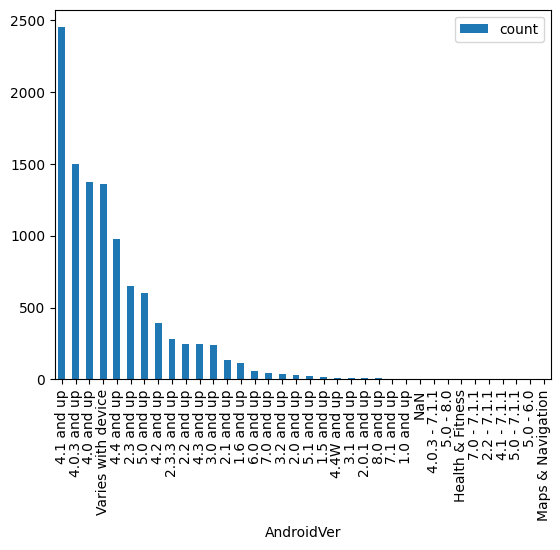

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

df.createOrReplaceTempView("df")

# Menjalankan query SQL untuk mengambil data dari dataframe dan menyimpannya dalam dataframe baru
df_sql = spark.sql("SELECT AndroidVer, COUNT(*) AS count FROM df GROUP BY AndroidVer;")

# Mengubah dataframe Spark menjadi dataframe Pandas
df_pd = df_sql.toPandas()

df_pd[['AndroidVer', 'count']].sort_values('count', ascending=False).plot(kind='bar', x='AndroidVer')

In [165]:
df_sql = spark.sql("SELECT Category, SUM(Installs) as TotalInstall FROM df GROUP BY Category")
df_pd = df_sql.toPandas()

Text(0.5, 1.0, 'Total Installs Distribution')

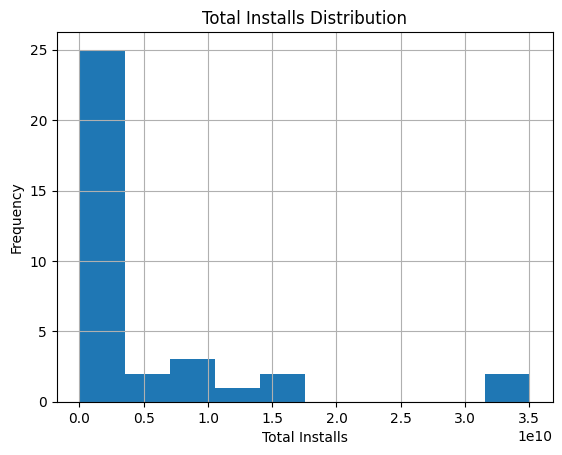

In [161]:
df_pd.hist()
plt.xlabel('Total Installs')
plt.ylabel('Frequency')
plt.title('Total Installs Distribution')

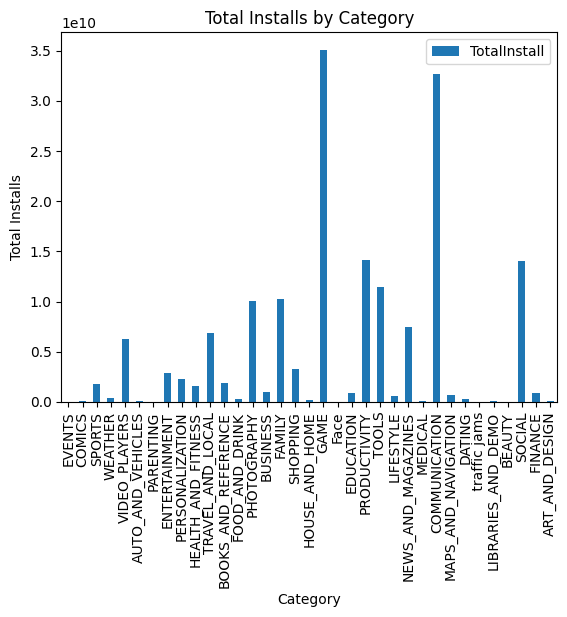

In [163]:
df_pd.plot(kind='bar', x='Category', y='TotalInstall')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs by Category')
plt.show()

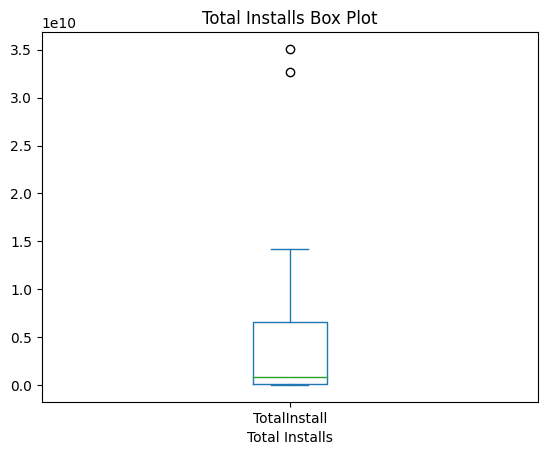

In [164]:
df_pd['TotalInstall'].plot(kind='box')
plt.xlabel('Total Installs')
plt.title('Total Installs Box Plot')
plt.show()